In [1]:
library(survival)

Warning message:
"package 'survival' was built under R version 3.6.3"

In [2]:
data(cancer)

In [20]:
help(cancer)

In [3]:
cancer

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
3,306,2,74,1,1,90,100,1175,NA
3,455,2,68,1,0,90,90,1225,15
3,1010,1,56,1,0,90,90,NA,15
5,210,2,57,1,1,90,60,1150,11
1,883,2,60,1,0,100,90,NA,0
12,1022,1,74,1,1,50,80,513,0
7,310,2,68,2,2,70,60,384,10
11,361,2,71,2,2,60,80,538,1
1,218,2,53,1,1,70,80,825,16
7,166,2,61,1,2,70,70,271,34


## Análisis descriptivo

**Limpieza de datos, valores nulos**

In [5]:
sum(is.na(cancer))

[1] 67

In [4]:
cancer2<-na.omit(cancer)
cancer2

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,3,455,2,68,1,0,90,90,1225,15
4,5,210,2,57,1,1,90,60,1150,11
6,12,1022,1,74,1,1,50,80,513,0
7,7,310,2,68,2,2,70,60,384,10
8,11,361,2,71,2,2,60,80,538,1
9,1,218,2,53,1,1,70,80,825,16
10,7,166,2,61,1,2,70,70,271,34
11,6,170,2,57,1,1,80,80,1025,27
15,12,567,2,57,1,1,80,70,2600,60
17,22,613,2,70,1,1,90,100,1150,-5


In [6]:
sum(is.na(cancer2))

[1] 0

**Gráficos de pastel**

In [8]:
table(cancer2$status, cancer2$sex)

   
     1  2
  1 21 26
  2 82 38

In [9]:
sexo<-factor(cancer2$sex)
#1 hombre
#2 mujer

In [10]:
levels(sexo)<-c("Masculino", "Fememino")

In [11]:
table(sexo)

sexo
Masculino  Fememino 
      103        64 

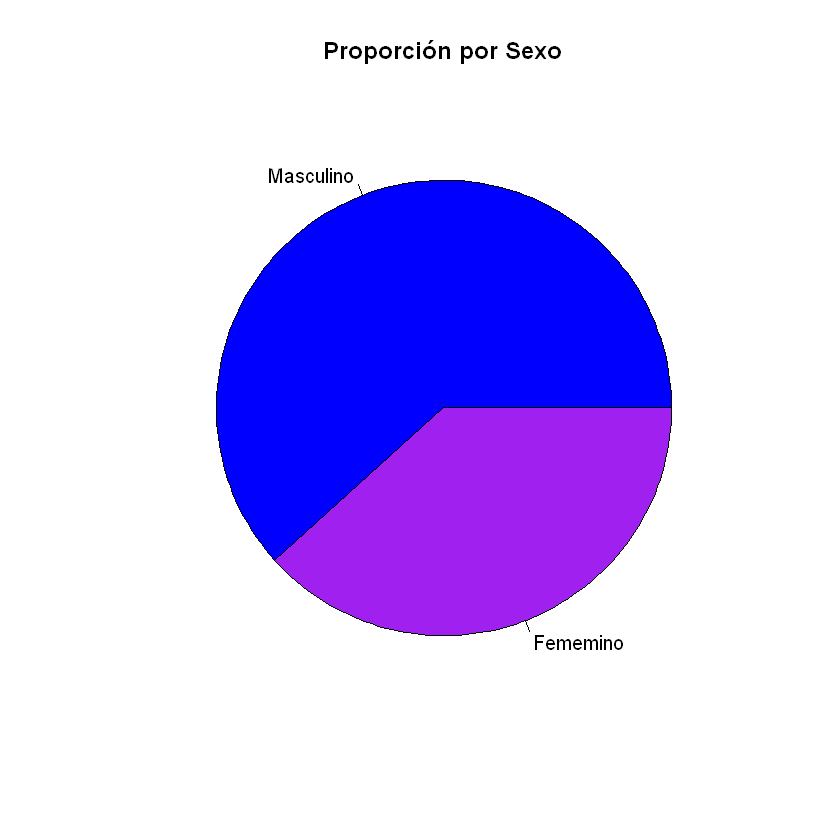

In [12]:
pie(table(sexo), col=c("blue", "purple"), main="Proporción por Sexo")

In [16]:
table(cancer2$status, cancer2$ph.ecog)

   
     0  1  2  3
  1 20 22  5  0
  2 27 59 33  1

In [ ]:
desempeño<-factor(cancer2$ph.ecog)
#Puntuación rendimiento
#0: asintomatico
#1: asintomatico pero medio ambulatorio
#2: mitad ambulatorio
#3: más de la mitad en cama
#4: en cama

In [17]:
levels(desempeño)<-c("Asintomatico", "Asintomatico medio ambulatorio", "Mitad ambulatorio", "Mas de la mitad en cama","En cama")

In [18]:
table(desempeño)

desempeño
                  Asintomatico Asintomatico medio ambulatorio 
                            47                             81 
             Mitad ambulatorio        Mas de la mitad en cama 
                            38                              1 
                       En cama 
                             0 

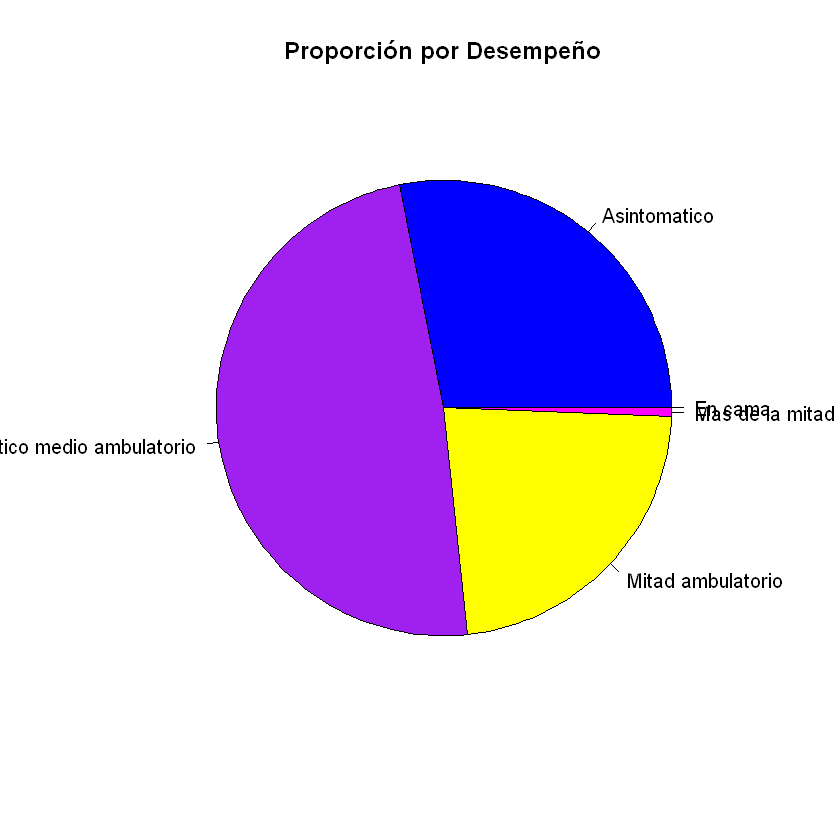

In [19]:
pie(table(desempeño), col=c("blue", "purple", "yellow", "magenta", "green"), main="Proporción por Desempeño")

In [21]:
estatus<-factor(cancer2$status)
#0 censurado
#1 muerte

In [22]:
levels(estatus)<-c("Censurado", "Muerto")
table(estatus)

estatus
Censurado    Muerto 
       47       120 

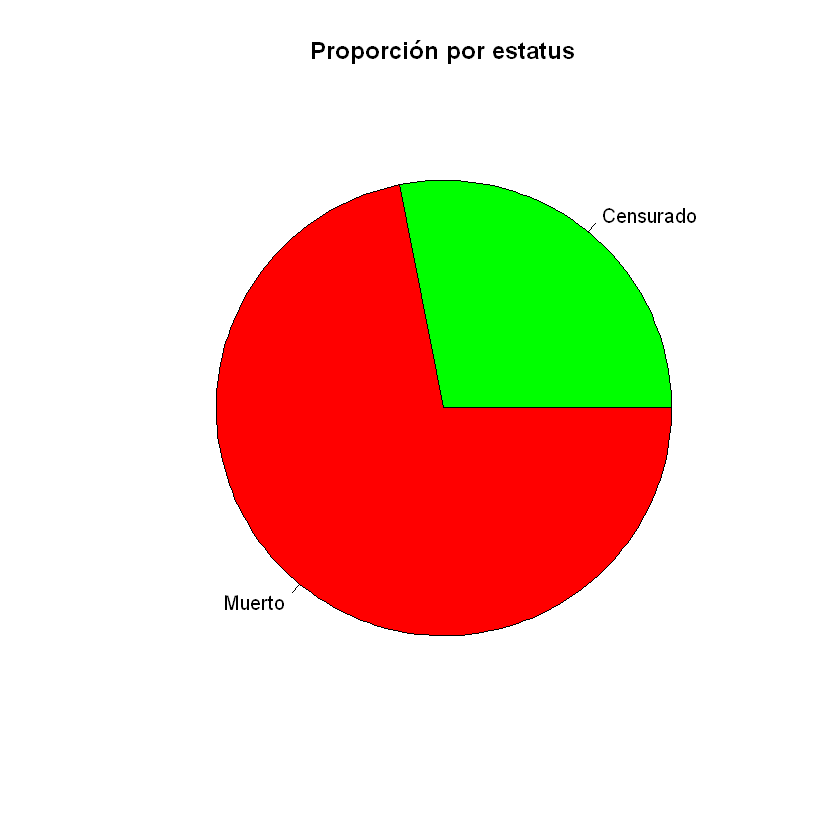

In [24]:
pie(table(estatus), col=c("green", "red"), main="Proporción por estatus")

**Boxplots**

**Comparativo de dispersión de tiempo por desempeño**

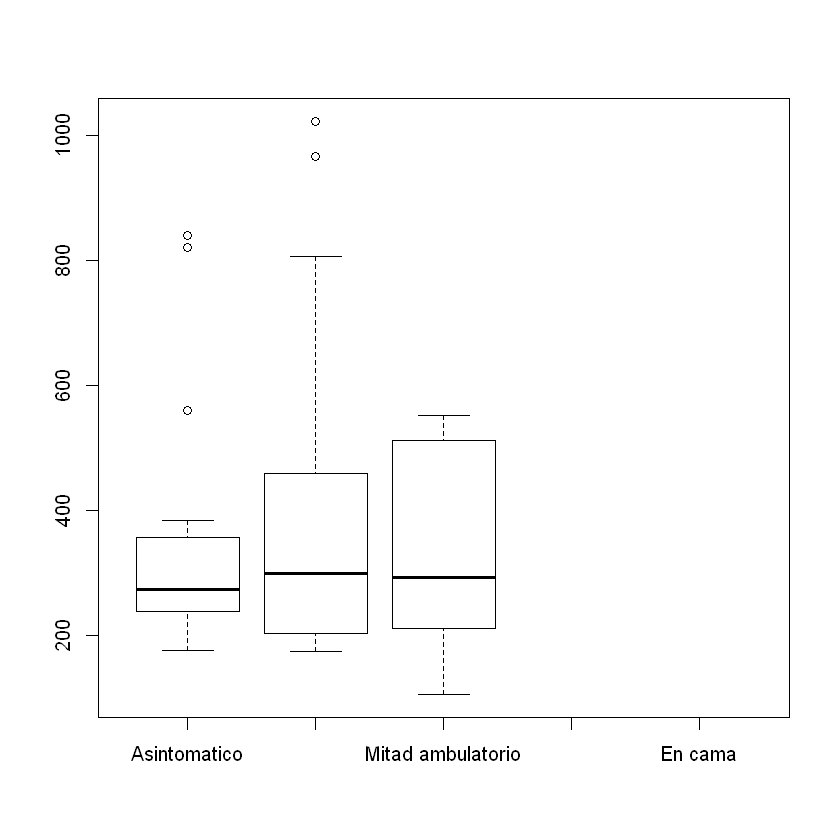

In [35]:
boxplot(cancer2$time[cancer2$status==1 & cancer2$ph.ecog==0],
       cancer2$time[cancer2$status==1 & cancer2$ph.ecog==1],
       cancer2$time[cancer2$status==1 & cancer2$ph.ecog==2],
       cancer2$time[cancer2$status==1 & cancer2$ph.ecog==3],
       cancer2$time[cancer2$status==1 & cancer2$ph.ecog==4], names=c("Asintomatico", "Asintomatico medio", "Mitad ambulatorio", "Mas en cama","En cama"))

**Comparativo de dispersión de tiempo por sexo**

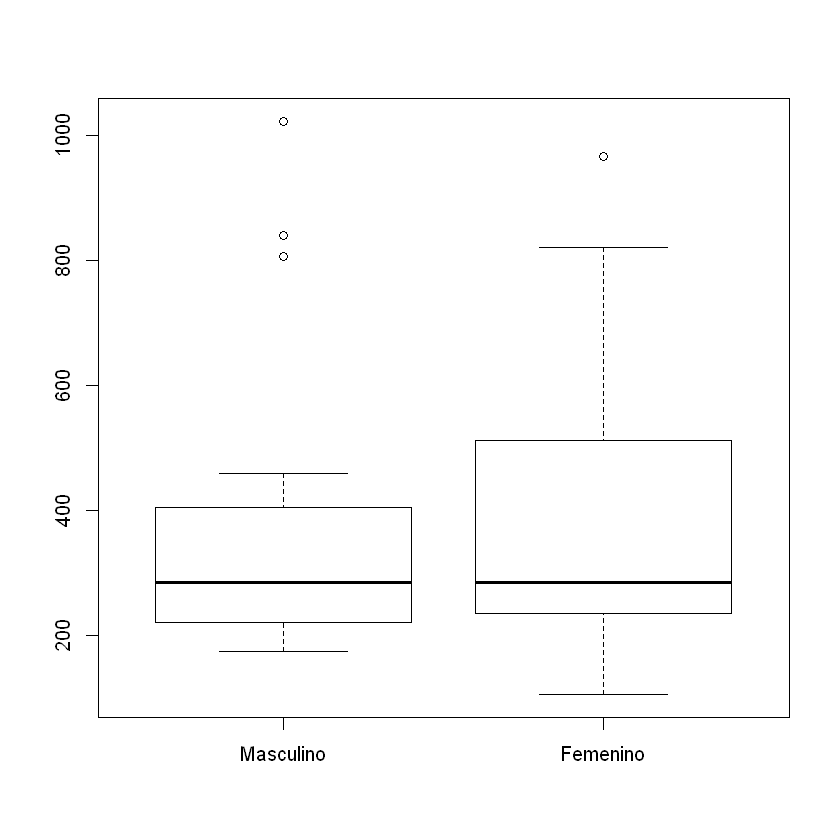

In [33]:
boxplot(cancer2$time[cancer2$status==1 & cancer2$sex==1],
       cancer2$time[cancer2$status==1 & cancer2$sex==2], names=c("Masculino", "Femenino"))

## Análisis de supervivencia mediante el modelo de Cox